In [14]:
import numpy as np

In [15]:
samp=np.load('/Users/mattocallaghan/Score_SBI/output/output_makemoons/samples/iter_8000_host_0/sample.npz')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mattocallaghan/Score_SBI/output/output_makemoons/samples/iter_8000_host_0/sample.npz'

In [41]:
samp[samp.files[0]].shape

(1, 5000, 2)

In [117]:
file_paths

[]

MovieWriter imagemagick unavailable; using Pillow instead.


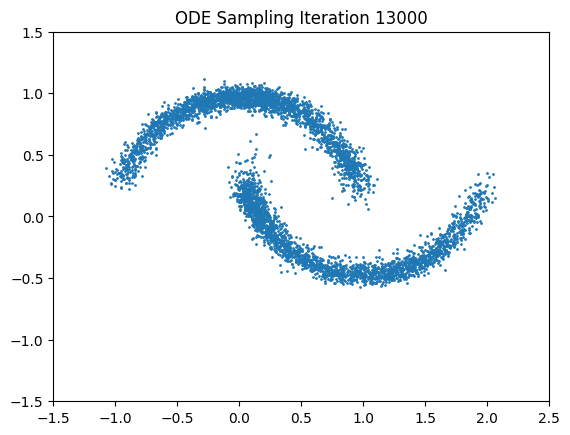

In [12]:
from matplotlib.animation import FuncAnimation
import glob

import matplotlib.pyplot as plt

# List of file paths
file_paths = sorted(glob.glob('/Users/mattocallaghan/Score_SBI/output/output_makemoons/samples/iter_*_host_0/sample.npz'))

fig, ax = plt.subplots()

def update(frame):
    ax.clear()
    samp = np.load(file_paths[frame])
    s = samp[samp.files[0]]
    #ax.scatter(X[:, 0], X[:, 1], cmap='viridis', s=1)

    ax.scatter(s[0, :, 0], s[0, :, 1], s=1)
    ax.set_xlim(-1.5,2.5)
    ax.set_ylim(-1.5,1.5)
    ax.set_title(f'ODE Sampling Iteration {frame * 1000 + 1000}')

ani = FuncAnimation(fig, update, frames=len(file_paths), repeat=True)
ani.save('/Users/mattocallaghan/Score_SBI/output/output_makemoons/pl/pc_morph_plot.gif', writer='imagemagick')
plt.show()


In [23]:
s.shape

(1, 5, 2)

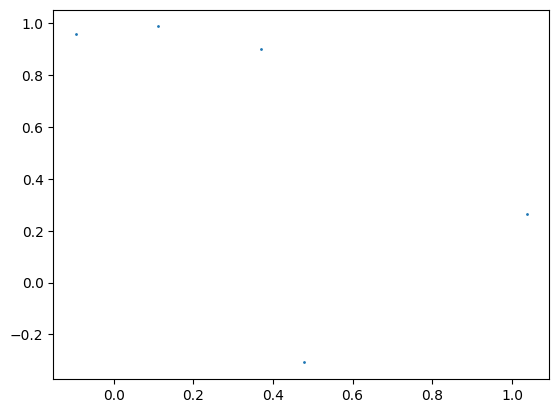

In [24]:
path="/Users/mattocallaghan/Score_SBI/output/output_makemoons/eval/ckpt_20_host_0/samples_1.npz"
samp = np.load(path)
s = samp[samp.files[0]]
plt.scatter(s[0, :, 0], s[0, :, 1], s=1)

(array([1178., 1315.,  646.,  597., 1222.,  747.,  370.,  345.,  867.,
        2713.]),
 array([-0.5746454 , -0.40927196, -0.24389848, -0.07852501,  0.08684844,
         0.25222188,  0.41759539,  0.58296883,  0.74834228,  0.91371572,
         1.07908916]),
 <BarContainer object of 10 artists>)

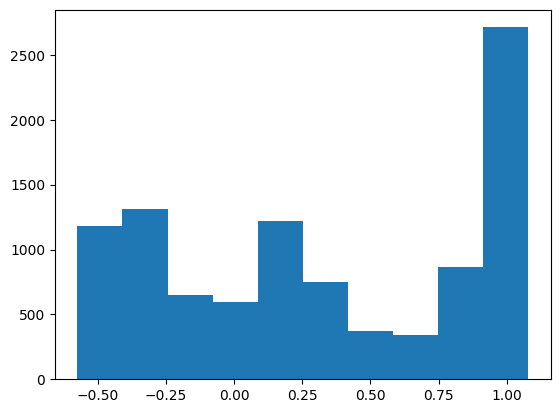

In [17]:
plt.hist(s[0, :, 1])

/var/folders/v8/qszwt8g90wj00vpb5s08vpdw0000gn/T/ipykernel_6925/2070282805.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[:, 1], label='Original Data KDE', shade=True, alpha=1.0)
/var/folders/v8/qszwt8g90wj00vpb5s08vpdw0000gn/T/ipykernel_6925/2070282805.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s[0, :, 1], label='Sample KDE ODE', shade=True, alpha=0.5)
/var/folders/v8/qszwt8g90wj00vpb5s08vpdw0000gn/T/ipykernel_6925/2070282805.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s[0, :, 1], label='Sample KDE PC', shade=True, alpha=0.5)


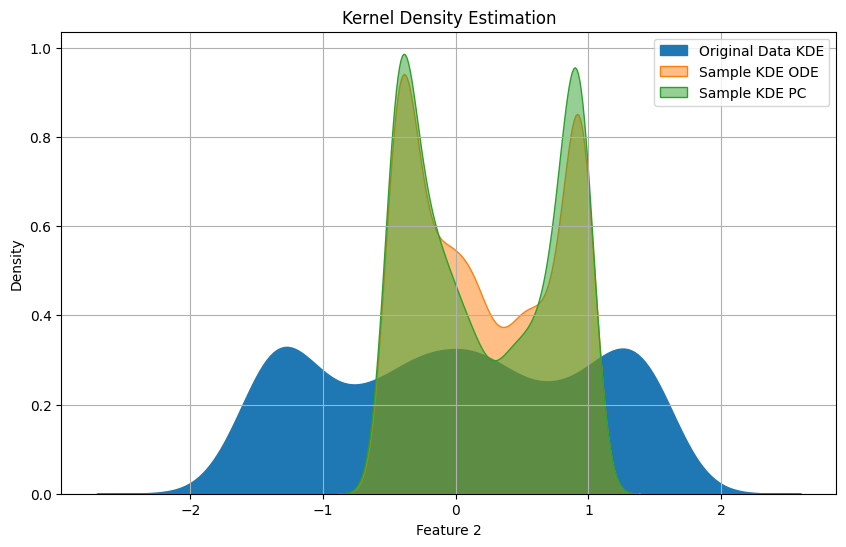

In [270]:
import seaborn as sns # type: ignore

# Load the last sample file
samp = np.load(file_paths[-1])
s = samp[samp.files[0]]

# Plot KDE for the sample and the original data
plt.figure(figsize=(10, 6))
sns.kdeplot(X[:, 1], label='Original Data KDE', shade=True, alpha=1.0)
sns.kdeplot(s[0, :, 1], label='Sample KDE ODE', shade=True, alpha=0.5)
samp = np.load(file_paths[-2])
s = samp[samp.files[0]]
sns.kdeplot(s[0, :, 1], label='Sample KDE PC', shade=True, alpha=0.5)



plt.title('Kernel Density Estimation')
plt.xlabel('Feature 2')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


FileNotFoundError: [Errno 2] No such file or directory: '/Users/mattocallaghan/Score_SBI/output/output_makemoons/samples/iter_14000_host_0/sample.npz'

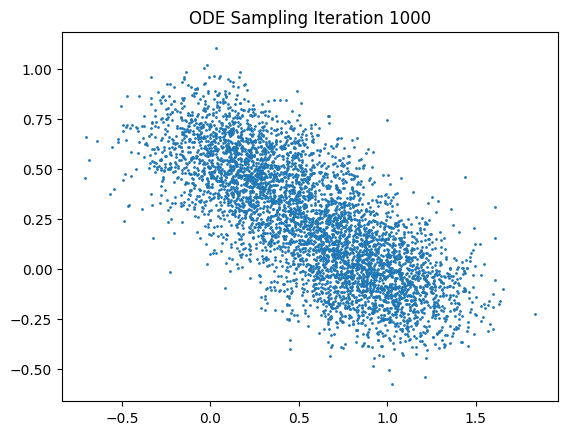

In [35]:
from matplotlib.animation import FuncAnimation

import matplotlib.pyplot as plt
k=14
rn=np.linspace(1000, 1000*k, k)
# List of file paths
file_paths = [
    f'/Users/mattocallaghan/Score_SBI/output/output_makemoons/samples/iter_{int(s)}_host_0/sample.npz' for s in rn
]

fig, ax = plt.subplots()

def update(frame):
    ax.clear()
    samp = np.load(file_paths[frame])
    s = samp[samp.files[0]]
    ax.scatter(s[0, 100:, 0], s[0, 100:, 1], s=1)

    ax.set_title(f'ODE Sampling Iteration {frame * 1000 + 1000}')

ani = FuncAnimation(fig, update, frames=len(file_paths), repeat=True)
ani.save('/Users/mattocallaghan/Score_SBI/output/output_makemoons/pl/pc_morph_plot.gif', writer='imagemagick')
plt.show()


# eval sampls

In [159]:
data_samples

[array(['joint_data'], dtype='<U10'),
 array(['joint_data', 'joint_data'], dtype='<U10'),
 array(['joint_data', 'joint_data', 'joint_data'], dtype='<U10'),
 array(['joint_data', 'joint_data', 'joint_data', 'joint_data'],
       dtype='<U10'),
 array(['joint_data', 'joint_data', 'joint_data', 'joint_data',
        'joint_data'], dtype='<U10')]

In [315]:
import glob
# List of file paths
file_paths_likelihood = sorted(glob.glob('/Users/mattocallaghan/Score_SBI/output/output_makemoons/eval/test_ckpt_20_bpd*.npz'))
file_paths_data = sorted(glob.glob('/Users/mattocallaghan/Score_SBI/output/output_makemoons/eval/test_ckpt_20_data*.npz'))

# Load and stack data samples
data_samples = [np.load(fp)[np.load(fp).files[0]] for fp in file_paths_data[0:]]
stacked_data = np.vstack(data_samples).reshape(-1,2)

# Load and stack likelihood samples
likelihood_samples = [np.load(fp)[np.load(fp).files[0]] for fp in file_paths_likelihood[0:]]
stacked_likelihood = np.vstack(likelihood_samples).flatten()

print("Stacked Data Shape:", stacked_data.shape)
print("Stacked Likelihood Shape:", stacked_likelihood.shape)

Stacked Data Shape: (10000, 2)
Stacked Likelihood Shape: (10000,)


# Basically the score cant get the relative distribution, and the likelihood is bad off the original dataset, so mix both to get good anwers, i think multiple steps of gradient, will help ensure that the terms end up where you want 

In [4]:
import numpy as np
from scipy.interpolate import griddata

import matplotlib.pyplot as plt
import glob
# List of file paths
file_paths_likelihood = sorted(glob.glob('/Users/mattocallaghan/Score_SBI/output/output_makemoons/eval/test_ckpt_20_bpd*.npz'))
file_paths_data = sorted(glob.glob('/Users/mattocallaghan/Score_SBI/output/output_makemoons/eval/test_ckpt_20_gradients*.npz'))

# Load and stack data samples
data_samples = [np.load(fp)[np.load(fp).files[0]] for fp in file_paths_data[0:]]
stacked_data = np.vstack(data_samples).reshape(-1,2)

# Load and stack likelihood samples
likelihood_samples = [np.load(fp)[np.load(fp).files[0]] for fp in file_paths_likelihood[0:]]
stacked_likelihood = np.vstack(likelihood_samples).flatten()
# Example data
x = stacked_data[:,0]
y = stacked_data[:,1]
z = stacked_likelihood

# Create grid values first.
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Plot
plt.figure(figsize=(8, 6))

plt.contourf(xi, yi, zi, levels=5, cmap='viridis')
plt.colorbar(label='Z value')
plt.scatter(x, y, c=z, edgecolors='k')  # Plot original data points
plt.scatter(X_moons[:, 0], X_moons[:, 1],s=1,c='black')

plt.title('Smooth Interpolated Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

ValueError: different number of values and points

In [8]:
data_samples[0]

(1, 5000, 2, 4)

(array([  8.,  10.,  12.,  16.,  15.,  19.,  20.,  21.,  27.,  29.,  34.,
         45.,  42.,  45.,  45.,  43.,  42.,  43.,  41.,  48.,  36.,  47.,
         42.,  40.,  52.,  56., 107., 105., 106., 117., 102., 108., 117.,
        108., 112.,  97., 103.,  88.,  84.,  78.,  73.,  78.,  67.,  71.,
         74.,  68.,  76.,  73.,  86.,  88.,  93., 101., 100., 122.,  87.,
        130., 117., 130., 131., 119., 153., 147., 162., 199., 165., 142.,
        149., 138., 157., 151., 155., 160., 169., 156., 154., 180., 145.,
        182., 154., 186., 160., 145., 130., 130., 131., 130., 128., 124.,
        132., 130., 129., 131., 125., 141., 146., 115., 123., 117., 113.,
        122.]),
 array([-921.37652588, -894.20513916, -867.03375244, -839.86236572,
        -812.69091797, -785.51953125, -758.34814453, -731.17675781,
        -704.00537109, -676.83398438, -649.66259766, -622.49121094,
        -595.31982422, -568.1484375 , -540.97698975, -513.80560303,
        -486.63421631, -459.46282959, -432.291

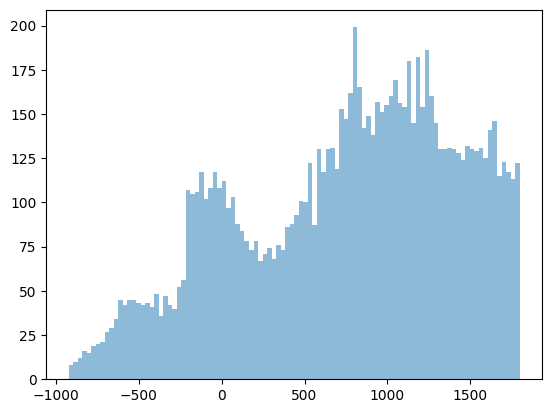

In [3]:
plt.hist(data_samples[0].flatten(), bins=100, alpha=0.5, label='Data')

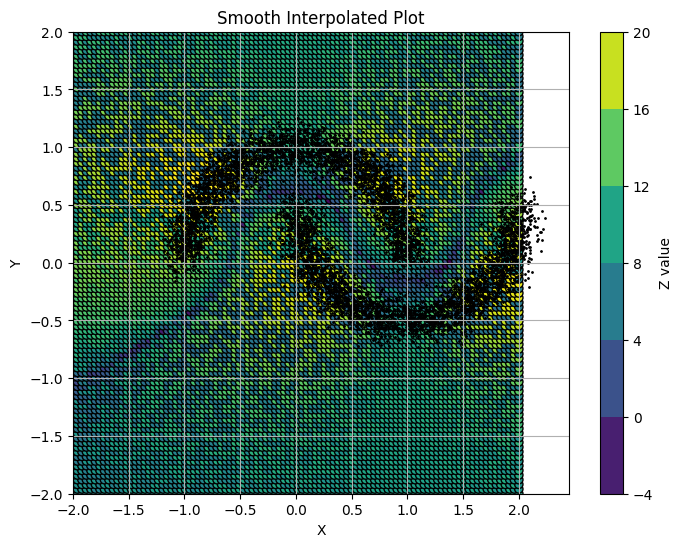

In [316]:
import numpy as np
from scipy.interpolate import griddata

import matplotlib.pyplot as plt

# Example data
x = stacked_data[:,0]
y = stacked_data[:,1]
z = stacked_likelihood

# Create grid values first.
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Plot
plt.figure(figsize=(8, 6))

plt.contourf(xi, yi, zi, levels=5, cmap='viridis')
plt.colorbar(label='Z value')
plt.scatter(x, y, c=z, edgecolors='k')  # Plot original data points
plt.scatter(X_moons[:, 0], X_moons[:, 1],s=1,c='black')

plt.title('Smooth Interpolated Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [293]:
y

array([-2., -2., -2., ...,  2.,  2.,  2.])

(array([160., 413., 250., 228., 192., 208., 235., 243., 437., 134.]),
 array([-0.24688772,  0.00331408,  0.25351588,  0.50371768,  0.75391948,
         1.00412128,  1.25432308,  1.50452488,  1.75472668,  2.00492848,
         2.25513028]),
 <BarContainer object of 10 artists>)

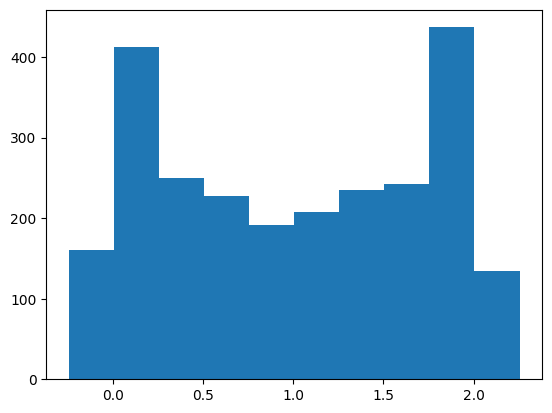

In [296]:
plt.hist(X_moons[y_moons==1, 0])


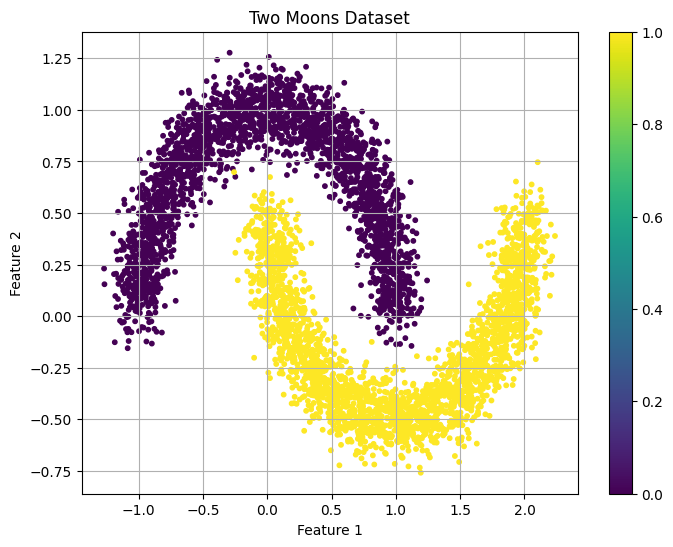

In [301]:
from sklearn.datasets import make_moons

# Number of samples
n = 5000

# Generate two moons dataset
X_moons, y_moons = make_moons(n_samples=n, noise=0.1)

# Plot the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', s=10)
plt.title('Two Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.grid(True)
plt.show()

In [208]:
100*100

10000

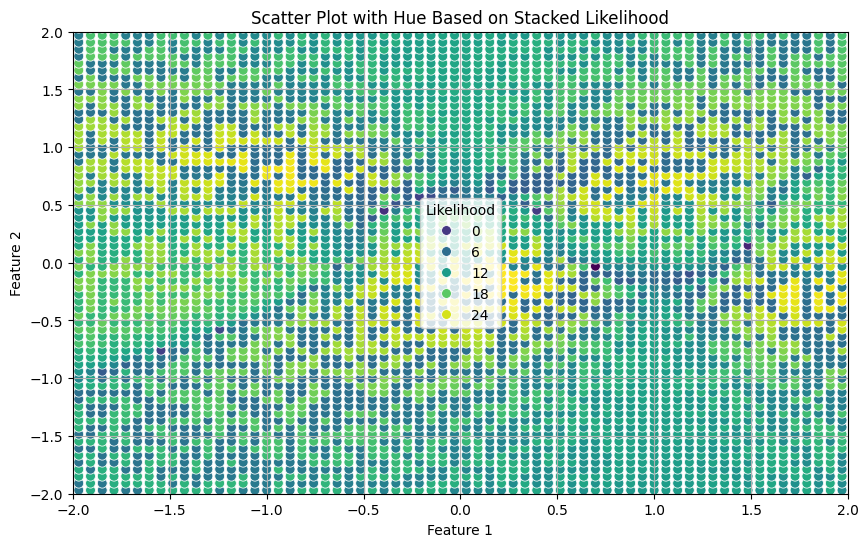

In [207]:
import seaborn as sns

# Flatten the data for plotting
data_flat = stacked_data.reshape(-1, stacked_data.shape[-1])
likelihood_flat = stacked_likelihood.flatten()

# Create a scatter plot with hue based on likelihood
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_flat[:, 0], y=data_flat[:, 1], hue=likelihood_flat, palette='viridis', s=50)
plt.title('Scatter Plot with Hue Based on Stacked Likelihood')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Likelihood')
plt.grid(True)
plt.show()